In [1]:
from spso2006DNF import SpsoDNF
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Stats tracking 1 lateral step scenario Noise

In [2]:
constantParamsDict =  dict(size=49,dt=0.1,dim=2,model='spike',activation='step',lateral="step",wrap=False)

In [4]:
nbRepet = 1
n=20
k=3
data_k_i = []
for i in range(nbRepet):
    print(i)
    pso = SpsoDNF(constantParamsDict=constantParamsDict,n=n,k=k,nbEvaluationMax=100,nbThread=8)
    pso.mainLoop()
    fit = pso.epochSummary['fitness']
    topo = pso.epochSummary['topology']
    indivs = pso.epochSummary['bestX']
    for epoch in range(len(fit)):
        x = indivs[epoch]
        data_k_i.append([n,k,i,epoch,fit[epoch],topo[epoch],x['iExc'],x['iInh'],x['wExc'],x['wInh']])
        
        
        


0


  File "/users/bchappet/Dropbox/THESE/workspace_python/SDNF/dnfpy/src/dnfpy/controller/runner.py", line 154, in step
    r.updateRunnable(self.simuTime)
Process Worker-36:
  File "/usr/lib/python3.4/multiprocessing/process.py", line 254, in _bootstrap
    self.run()
  File "/users/bchappet/Dropbox/THESE/workspace_python/SDNF/dnfpy/src/dnfpy/controller/runnable.py", line 69, in updateRunnable
    root_i.update(simuTime)
Traceback (most recent call last):
  File "/users/bchappet/Dropbox/THESE/workspace_python/SDNF/dnfpy/src/dnfpyUtils/optimisation/worker.py", line 118, in run
    result = self.function(self.indiv,*self.args)
  File "/users/bchappet/Dropbox/THESE/workspace_python/SDNF/dnfpy/src/dnfpy/core/mapND.py", line 138, in update
    child.update(simuTime)
  File "/usr/lib/python3.4/multiprocessing/process.py", line 254, in _bootstrap
    self.run()
  File "/users/bchappet/Dropbox/THESE/workspace_python/SDNF/dnfpy/src/dnfpyUtils/optimisation/spso2006DNF.py", line 106, in evaluate
  

KeyboardInterrupt: 

In [10]:
df = pd.DataFrame(data_k_i,columns=['n','k','i','epoch','fit','topo','iExc','iInh','wExc','wInh'])
#df.to_csv('trackin1_3scenario_sdnf_step')
df.head()


,n,k,i,epoch,fit,topo,iExc,iInh,wExc,wInh
0,20,3,0,0,0.23758138261510664,True,0.000010,0.000010,1.227577,1.803081
1,20,3,0,1,0.22541112396790855,True,0.263599,0.252548,0.708159,1.290452
2,20,3,0,2,0.22541112396790855,True,0.263599,0.252548,0.708159,1.290452
3,20,3,0,3,0.1589604318990577,True,1.719011,1.682546,0.087757,0.965418
4,20,3,0,4,0.154854855167901,True,9.052435,9.052435,0.099174,0.807147


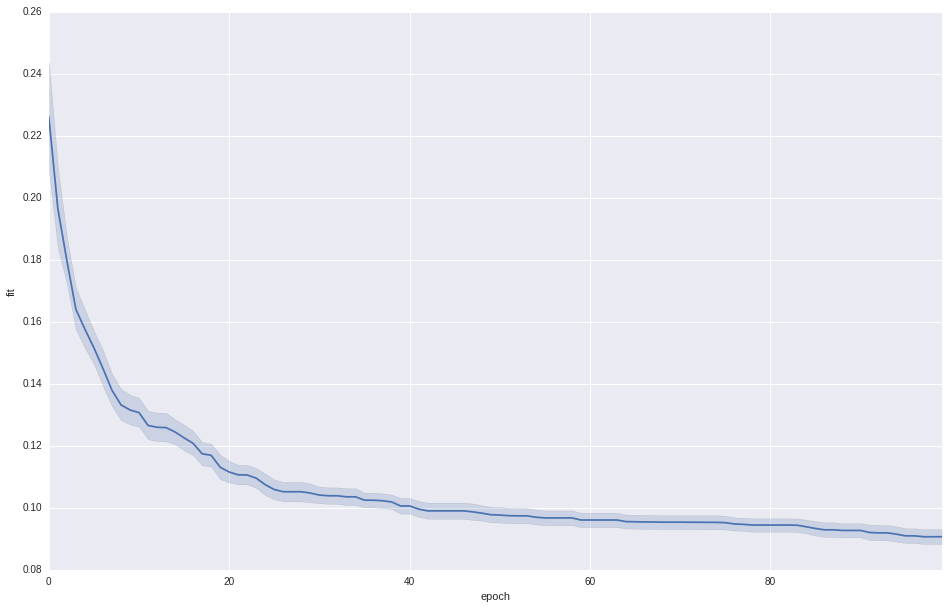

In [13]:
plt.figure(figsize=(16,10))
sns.tsplot(time='epoch',value='fit',unit='i',data=df)


# Test error Shape

In [37]:
from dnfpyUtils.stats.errorShape import ErrorShape

# Scenario Static1

In [158]:
constantParamsDict =  dict(size=49,dt=0.1,dim=2,model='spike',activation='step',lateral="dog",wrap=False)
listParam = ["iExc","iInh","wExc","wInh"]
bounds = (np.array([0,0,1e-3,1e-3]), np.array([5,1,1,1]))

In [159]:
def transformIndiv(indiv):
    """return the parameters dictionary which will be given to the model""" 
    # listGen = ["iExc","ik = iInh/iExc","wK=wExc/wInh","wInh","th"
    paramList = [0] * len(indiv)
    paramList[0] = indiv[0]
    paramList[1] = indiv[1]*indiv[0]
    paramList[2] = indiv[2]*indiv[3]
    paramList[3] = indiv[3]
    #paramList[4] = indiv[4]
    
    return paramList


In [160]:
nbRepet = 1
nbEvaluationMax = 100
n=20
k=3
data_k_i = []
for i in range(nbRepet):
    print(i)
    pso = SpsoDNF(constantParamsDict=constantParamsDict,n=n,k=k,nbEvaluationMax=nbEvaluationMax,nbThread=1,verbose=1,
                 transformIndiv=transformIndiv,listParam=listParam,bounds=bounds)
    pso.mainLoop()
    fit = pso.epochSummary['fitness']
    topo = pso.epochSummary['topology']
    indivs = pso.epochSummary['bestX']
    for epoch in range(len(fit)):
        x = indivs[epoch]
        data_k_i.append([n,k,i,epoch,fit[epoch],topo[epoch],x['iExc'],x['iInh'],x['wExc'],x['wInh']])
        
        

0
0 {'lateral': 'dog', 'iExc': 1.4449079523605213, 'iInh': 0.64608885833526486, 'wrap': False, 'dim': 2, 'activation': 'step', 'wInh': 0.43590551905608071, 'model': 'spike', 'wExc': 0.2841863400915231, 'size': 49, 'dt': 0.1} 0.995170704057

evaluate {'lateral': 'dog', 'iExc': 1.4449079523605213, 'iInh': 0.64608885833526486, 'wrap': False, 'dim': 2, 'activation': 'step', 'wInh': 0.43590551905608071, 'model': 'spike', 'wExc': 0.2841863400915231, 'size': 49, 'dt': 0.1}
[0.99517070405656838, 0.0, 20.0] 0.995170704057

1 {'lateral': 'dog', 'iExc': 4.8818886667797736, 'iInh': 0.11740446579087445, 'wrap': False, 'dim': 2, 'activation': 'step', 'wInh': 0.61611494333194305, 'model': 'spike', 'wExc': 0.56200649423007409, 'size': 49, 'dt': 0.1} 1.0

evaluate {'lateral': 'dog', 'iExc': 4.8818886667797736, 'iInh': 0.11740446579087445, 'wrap': False, 'dim': 2, 'activation': 'step', 'wInh': 0.61611494333194305, 'model': 'spike', 'wExc': 0.56200649423007409, 'size': 49, 'dt': 0.1}
[1.0, 0.0, 20.0] 1.0

Process Worker-22090:
Traceback (most recent call last):
  File "/usr/lib/python3.4/multiprocessing/process.py", line 254, in _bootstrap
    self.run()
  File "/users/bchappet/Dropbox/THESE/workspace_python/SDNF/dnfpy/src/dnfpyUtils/optimisation/worker.py", line 118, in run
    result = self.function(self.indiv,*self.args)
  File "/users/bchappet/Dropbox/THESE/workspace_python/SDNF/dnfpy/src/dnfpyUtils/optimisation/spso2006DNF.py", line 82, in evaluate
    res = runner.launch(model, scenario,statistic, timeEnd,allowedTime)
  File "/users/bchappet/Dropbox/THESE/workspace_python/SDNF/dnfpy/src/dnfpy/controller/runner.py", line 206, in launch
    return runner.run()
  File "/users/bchappet/Dropbox/THESE/workspace_python/SDNF/dnfpy/src/dnfpy/controller/runner.py", line 181, in run
    self.step()
  File "/users/bchappet/Dropbox/THESE/workspace_python/SDNF/dnfpy/src/dnfpy/controller/runner.py", line 154, in step
    r.updateRunnable(self.simuTime)
  File "/users/bchappet/Dropbox/THESE/works

KeyboardInterrupt: 

In [ ]:
df = pd.DataFrame(data_k_i,columns=['n','k','i','epoch','fit','topo','iExc','iInh','wExc','wInh'])
#df.to_csv('trackin1_3scenario_sdnf_step')
df.head()


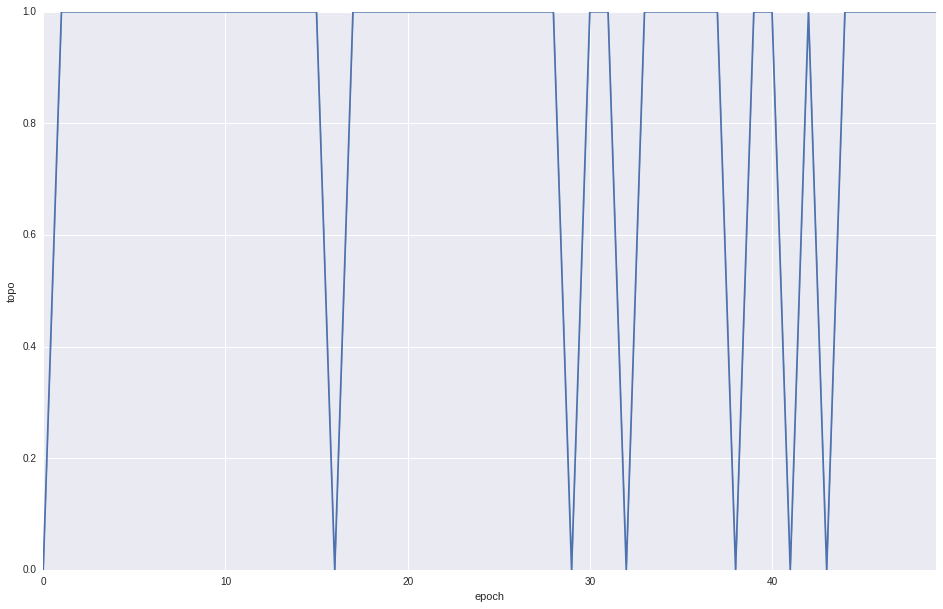

In [117]:
plt.figure(figsize=(16,10))
sns.tsplot(time='epoch',value='topo',unit='i',data=df)


In [72]:
summary = pso.epochSummary
bestX = summary['bestX']

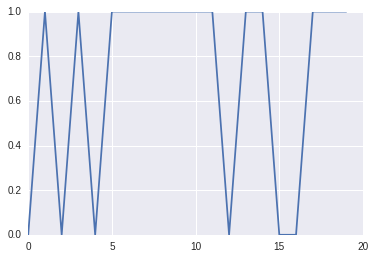

In [73]:
plt.plot(topo)

In [92]:
log = pso.log
print(len(log['f']))

50


In [93]:
f = np.array(log['f'])
p = np.array(log['p'])
x = np.array(log['x'])
v = np.array(log['v'])

fp = np.array(log['fp'])

l = np.array(log['l'])


lp = np.zeros_like(x)
for i in range(len(log['f'])):
    for j in range(20):
        lp[i,j,:] = p[i,l[i,j],:]

0.533079095619


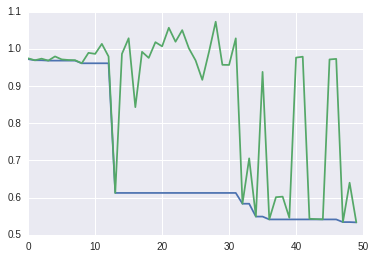

In [94]:
indiv = 10
plt.plot(fp[:,indiv])
plt.plot(f[:,indiv])
print(np.min(fp))

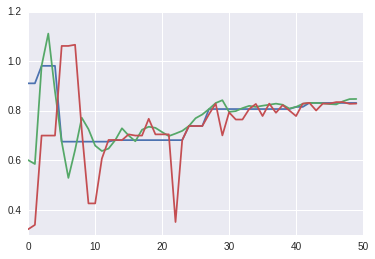

In [107]:
indiv = 1
dim = 3
plt.plot(p[:,indiv,dim])
plt.plot(x[:,indiv,dim])
plt.plot(lp[:,indiv,dim])
